## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2

"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [7]:
results = {}
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 = 0.010000, L2 = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions fo

Epoch 48/50
50000/50000 [==============================] - 21s 419us/step - loss: 2.4614 - acc: 0.0979 - val_loss: 2.4613 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 21s 427us/step - loss: 2.4614 - acc: 0.0963 - val_loss: 2.4613 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 21s 429us/step - loss: 2.4614 - acc: 0.0985 - val_loss: 2.4614 - val_acc: 0.1000
Experiment with L1 = 0.010000, L2 = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_

Epoch 49/50
50000/50000 [==============================] - 24s 481us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 25s 493us/step - loss: 2.4626 - acc: 0.0986 - val_loss: 2.4625 - val_acc: 0.1000
Experiment with L1 = 0.010000, L2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense) 

Epoch 50/50
50000/50000 [==============================] - 28s 554us/step - loss: 2.4626 - acc: 0.0982 - val_loss: 2.4625 - val_acc: 0.1000
Experiment with L1 = 0.010000, L2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_____________

50000/50000 [==============================] - 21s 422us/step - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4626 - val_acc: 0.1000
Experiment with L1 = 0.010000, L2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________

50000/50000 [==============================] - 21s 425us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4626 - val_acc: 0.1000
Experiment with L1 = 0.000100, L2 = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________

Experiment with L1 = 0.000100, L2 = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 36s 726us/step - loss: 6.0075 - acc: 0.2760 - val_loss: 5.8234 - val_acc: 0.3391
Epoch 2/50
50000/50000 [==============================] - 23s 462us/step - loss: 5.7242 - acc: 0.3627 - val_loss: 5.6494 - val_acc: 0.3781
Epoch 3/50
50000/50000 [==============================] - 22s 437us/step - loss: 5.5745 - acc: 0.3947 - val_loss: 5.5156 - val_acc: 0.4085
Epoch 4/50
50000/50000 [==============================] - 22s 445us/step - loss: 5.4521 - acc: 0.4160 - val_loss: 5.4050 - val_acc: 0.4255
Epoch 5/50
50000/50000 [==============================] - 22s 439us/step - loss: 5.3446 - acc: 0.4321 - val_loss: 5.3017 - val_acc: 0.4396
Epoch 6/50
50000/50000 [==============================] - 22s 440us/step - loss: 5.2429 - acc: 0.4455 - val_loss: 5.2110 - val_acc: 0.4435
Epoch 7/50
50000/50000 [==============================] - 22s 438us/step - loss: 5.1489 - acc: 0.4549 - val_loss: 5.

50000/50000 [==============================] - 23s 468us/step - loss: 6.0074 - acc: 0.2769 - val_loss: 5.8227 - val_acc: 0.3358
Epoch 2/50
50000/50000 [==============================] - 22s 431us/step - loss: 5.7247 - acc: 0.3625 - val_loss: 5.6401 - val_acc: 0.3911
Epoch 3/50
50000/50000 [==============================] - 21s 428us/step - loss: 5.5781 - acc: 0.3917 - val_loss: 5.5214 - val_acc: 0.4042
Epoch 4/50
50000/50000 [==============================] - 22s 439us/step - loss: 5.4564 - acc: 0.4107 - val_loss: 5.3945 - val_acc: 0.4234
Epoch 5/50
50000/50000 [==============================] - 21s 429us/step - loss: 5.3437 - acc: 0.4281 - val_loss: 5.2905 - val_acc: 0.4367
Epoch 6/50
50000/50000 [==============================] - 21s 424us/step - loss: 5.2401 - acc: 0.4435 - val_loss: 5.2010 - val_acc: 0.4435
Epoch 7/50
50000/50000 [==============================] - 22s 443us/step - loss: 5.1458 - acc: 0.4554 - val_loss: 5.1196 - val_acc: 0.4506
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 21s 425us/step - loss: 5.7286 - acc: 0.3613 - val_loss: 5.6531 - val_acc: 0.3863
Epoch 3/50
50000/50000 [==============================] - 22s 445us/step - loss: 5.5895 - acc: 0.3896 - val_loss: 5.5258 - val_acc: 0.4049
Epoch 4/50
50000/50000 [==============================] - 26s 516us/step - loss: 5.4726 - acc: 0.4076 - val_loss: 5.4262 - val_acc: 0.4125
Epoch 5/50
50000/50000 [==============================] - 24s 486us/step - loss: 5.3620 - acc: 0.4264 - val_loss: 5.3209 - val_acc: 0.4274
Epoch 6/50
50000/50000 [==============================] - 22s 432us/step - loss: 5.2596 - acc: 0.4389 - val_loss: 5.2134 - val_acc: 0.4421
Epoch 7/50
50000/50000 [==============================] - 21s 430us/step - loss: 5.1627 - acc: 0.4493 - val_loss: 5.1352 - val_acc: 0.4494
Epoch 8/50
50000/50000 [==============================] - 22s 431us/step - loss: 5.0723 - acc: 0.4592 - val_loss: 5.0474 - val_acc: 0.4565
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 22s 431us/step - loss: 11.3257 - acc: 0.3808 - val_loss: 10.5751 - val_acc: 0.3911
Epoch 4/50
50000/50000 [==============================] - 22s 442us/step - loss: 9.9146 - acc: 0.3953 - val_loss: 9.2759 - val_acc: 0.3930
Epoch 5/50
50000/50000 [==============================] - 22s 439us/step - loss: 8.7162 - acc: 0.4054 - val_loss: 8.1828 - val_acc: 0.4018
Epoch 6/50
50000/50000 [==============================] - 23s 456us/step - loss: 7.6952 - acc: 0.4126 - val_loss: 7.2332 - val_acc: 0.4205
Epoch 7/50
50000/50000 [==============================] - 23s 460us/step - loss: 6.8238 - acc: 0.4218 - val_loss: 6.4303 - val_acc: 0.4293
Epoch 8/50
50000/50000 [==============================] - 22s 440us/step - loss: 6.0819 - acc: 0.4258 - val_loss: 5.7475 - val_acc: 0.4259
Epoch 9/50
50000/50000 [==============================] - 22s 435us/step - loss: 5.4462 - acc: 0.4316 - val_loss: 5.1598 - val_acc: 0.4345
Epoch 10/50
50000/50000 [

Epoch 4/50
50000/50000 [==============================] - 22s 432us/step - loss: 1.8089 - acc: 0.4158 - val_loss: 1.7904 - val_acc: 0.4192
Epoch 5/50
50000/50000 [==============================] - 21s 430us/step - loss: 1.7616 - acc: 0.4326 - val_loss: 1.7509 - val_acc: 0.4353
Epoch 6/50
50000/50000 [==============================] - 21s 430us/step - loss: 1.7242 - acc: 0.4456 - val_loss: 1.7180 - val_acc: 0.4496
Epoch 7/50
50000/50000 [==============================] - 22s 444us/step - loss: 1.6902 - acc: 0.4579 - val_loss: 1.7096 - val_acc: 0.4409
Epoch 8/50
50000/50000 [==============================] - 21s 421us/step - loss: 1.6627 - acc: 0.4650 - val_loss: 1.6714 - val_acc: 0.4604
Epoch 9/50
50000/50000 [==============================] - 21s 420us/step - loss: 1.6351 - acc: 0.4757 - val_loss: 1.6502 - val_acc: 0.4642
Epoch 10/50
50000/50000 [==============================] - 21s 428us/step - loss: 1.6114 - acc: 0.4845 - val_loss: 1.6392 - val_acc: 0.4657
Epoch 11/50
50000/50000 [=

50000/50000 [==============================] - 22s 439us/step - loss: 1.6618 - acc: 0.4162 - val_loss: 1.6401 - val_acc: 0.4271
Epoch 5/50
50000/50000 [==============================] - 21s 418us/step - loss: 1.6145 - acc: 0.4350 - val_loss: 1.6079 - val_acc: 0.4364
Epoch 6/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.5731 - acc: 0.4494 - val_loss: 1.5790 - val_acc: 0.4482
Epoch 7/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.5389 - acc: 0.4609 - val_loss: 1.5415 - val_acc: 0.4593
Epoch 8/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.5078 - acc: 0.4725 - val_loss: 1.5207 - val_acc: 0.4628
Epoch 9/50
50000/50000 [==============================] - 21s 420us/step - loss: 1.4816 - acc: 0.4830 - val_loss: 1.5013 - val_acc: 0.4721
Epoch 10/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.4561 - acc: 0.4897 - val_loss: 1.4756 - val_acc: 0.4738
Epoch 11/50
50000/50000 [============

Epoch 5/50
50000/50000 [==============================] - 22s 438us/step - loss: 1.6110 - acc: 0.4358 - val_loss: 1.6045 - val_acc: 0.4327
Epoch 6/50
50000/50000 [==============================] - 23s 453us/step - loss: 1.5701 - acc: 0.4498 - val_loss: 1.5786 - val_acc: 0.4375
Epoch 7/50
50000/50000 [==============================] - 22s 439us/step - loss: 1.5355 - acc: 0.4611 - val_loss: 1.5450 - val_acc: 0.4555
Epoch 8/50
50000/50000 [==============================] - 22s 438us/step - loss: 1.5054 - acc: 0.4729 - val_loss: 1.5144 - val_acc: 0.4634
Epoch 9/50
50000/50000 [==============================] - 22s 443us/step - loss: 1.4783 - acc: 0.4806 - val_loss: 1.5044 - val_acc: 0.4664
Epoch 10/50
50000/50000 [==============================] - 23s 450us/step - loss: 1.4537 - acc: 0.4878 - val_loss: 1.4705 - val_acc: 0.4830
Epoch 11/50
50000/50000 [==============================] - 22s 446us/step - loss: 1.4301 - acc: 0.4965 - val_loss: 1.4650 - val_acc: 0.4780
Epoch 12/50
50000/50000 [

Epoch 6/50
50000/50000 [==============================] - 22s 440us/step - loss: 1.5860 - acc: 0.4454 - val_loss: 1.5689 - val_acc: 0.4486
Epoch 7/50
50000/50000 [==============================] - 22s 443us/step - loss: 1.5519 - acc: 0.4586 - val_loss: 1.5564 - val_acc: 0.4503
Epoch 8/50
50000/50000 [==============================] - 22s 444us/step - loss: 1.5205 - acc: 0.4679 - val_loss: 1.5212 - val_acc: 0.4647
Epoch 9/50
50000/50000 [==============================] - 22s 444us/step - loss: 1.4911 - acc: 0.4778 - val_loss: 1.5126 - val_acc: 0.4656
Epoch 10/50
50000/50000 [==============================] - 22s 448us/step - loss: 1.4659 - acc: 0.4856 - val_loss: 1.4895 - val_acc: 0.4705
Epoch 11/50
50000/50000 [==============================] - 22s 440us/step - loss: 1.4421 - acc: 0.4931 - val_loss: 1.4702 - val_acc: 0.4790
Epoch 12/50
50000/50000 [==============================] - 22s 438us/step - loss: 1.4183 - acc: 0.5018 - val_loss: 1.4630 - val_acc: 0.4832
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 22s 448us/step - loss: 6.8468 - acc: 0.4177 - val_loss: 6.4556 - val_acc: 0.4193
Epoch 8/50
50000/50000 [==============================] - 22s 439us/step - loss: 6.1013 - acc: 0.4244 - val_loss: 5.7654 - val_acc: 0.4261
Epoch 9/50
50000/50000 [==============================] - 22s 446us/step - loss: 5.4657 - acc: 0.4292 - val_loss: 5.1838 - val_acc: 0.4255
Epoch 10/50
50000/50000 [==============================] - 22s 440us/step - loss: 4.9208 - acc: 0.4356 - val_loss: 4.6728 - val_acc: 0.4370
Epoch 11/50
50000/50000 [==============================] - 22s 445us/step - loss: 4.4540 - acc: 0.4391 - val_loss: 4.2485 - val_acc: 0.4398
Epoch 12/50
50000/50000 [==============================] - 24s 476us/step - loss: 4.0562 - acc: 0.4441 - val_loss: 3.8770 - val_acc: 0.4429
Epoch 13/50
50000/50000 [==============================] - 23s 463us/step - loss: 3.7141 - acc: 0.4499 - val_loss: 3.5811 - val_acc: 0.4397
Epoch 14/50
50000/50000

Epoch 8/50
50000/50000 [==============================] - 22s 435us/step - loss: 1.6545 - acc: 0.4686 - val_loss: 1.6660 - val_acc: 0.4605
Epoch 9/50
50000/50000 [==============================] - 22s 436us/step - loss: 1.6291 - acc: 0.4776 - val_loss: 1.6475 - val_acc: 0.4698
Epoch 10/50
50000/50000 [==============================] - 22s 436us/step - loss: 1.6036 - acc: 0.4861 - val_loss: 1.6530 - val_acc: 0.4677
Epoch 11/50
50000/50000 [==============================] - 22s 439us/step - loss: 1.5800 - acc: 0.4932 - val_loss: 1.6283 - val_acc: 0.4762
Epoch 12/50
50000/50000 [==============================] - 22s 438us/step - loss: 1.5599 - acc: 0.5007 - val_loss: 1.6040 - val_acc: 0.4865
Epoch 13/50
50000/50000 [==============================] - 22s 436us/step - loss: 1.5378 - acc: 0.5090 - val_loss: 1.5933 - val_acc: 0.4837
Epoch 14/50
50000/50000 [==============================] - 22s 436us/step - loss: 1.5170 - acc: 0.5149 - val_loss: 1.5865 - val_acc: 0.4884
Epoch 15/50
50000/5000

Epoch 9/50
50000/50000 [==============================] - 21s 423us/step - loss: 1.4920 - acc: 0.4775 - val_loss: 1.5084 - val_acc: 0.4678
Epoch 10/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.4669 - acc: 0.4859 - val_loss: 1.5077 - val_acc: 0.4627
Epoch 11/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.4431 - acc: 0.4934 - val_loss: 1.4857 - val_acc: 0.4758
Epoch 12/50
50000/50000 [==============================] - 21s 426us/step - loss: 1.4209 - acc: 0.5019 - val_loss: 1.4590 - val_acc: 0.4773
Epoch 13/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.3984 - acc: 0.5088 - val_loss: 1.4480 - val_acc: 0.4866
Epoch 14/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.3769 - acc: 0.5163 - val_loss: 1.4435 - val_acc: 0.4836
Epoch 15/50
50000/50000 [==============================] - 22s 433us/step - loss: 1.3576 - acc: 0.5230 - val_loss: 1.4323 - val_acc: 0.4959
Epoch 16/50
50000/500

Epoch 10/50
50000/50000 [==============================] - 21s 426us/step - loss: 1.4627 - acc: 0.4875 - val_loss: 1.4925 - val_acc: 0.4697
Epoch 11/50
50000/50000 [==============================] - 21s 421us/step - loss: 1.4393 - acc: 0.4955 - val_loss: 1.4695 - val_acc: 0.4815
Epoch 12/50
50000/50000 [==============================] - 21s 423us/step - loss: 1.4152 - acc: 0.5026 - val_loss: 1.4730 - val_acc: 0.4873
Epoch 13/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.3947 - acc: 0.5100 - val_loss: 1.4743 - val_acc: 0.4780
Epoch 14/50
50000/50000 [==============================] - 21s 421us/step - loss: 1.3765 - acc: 0.5172 - val_loss: 1.4474 - val_acc: 0.4883
Epoch 15/50
50000/50000 [==============================] - 21s 423us/step - loss: 1.3570 - acc: 0.5227 - val_loss: 1.4154 - val_acc: 0.5007
Epoch 16/50
50000/50000 [==============================] - 21s 422us/step - loss: 1.3390 - acc: 0.5287 - val_loss: 1.4147 - val_acc: 0.4950
Epoch 17/50
50000/50

Epoch 11/50
50000/50000 [==============================] - 21s 410us/step - loss: 1.4467 - acc: 0.4933 - val_loss: 1.4676 - val_acc: 0.4780
Epoch 12/50
50000/50000 [==============================] - 23s 466us/step - loss: 1.4228 - acc: 0.5019 - val_loss: 1.4736 - val_acc: 0.4790
Epoch 13/50
50000/50000 [==============================] - 25s 493us/step - loss: 1.4004 - acc: 0.5069 - val_loss: 1.4470 - val_acc: 0.4858
Epoch 14/50
50000/50000 [==============================] - 21s 418us/step - loss: 1.3789 - acc: 0.5169 - val_loss: 1.4539 - val_acc: 0.4814
Epoch 15/50
50000/50000 [==============================] - 22s 438us/step - loss: 1.3607 - acc: 0.5238 - val_loss: 1.4198 - val_acc: 0.4942
Epoch 16/50
50000/50000 [==============================] - 22s 431us/step - loss: 1.3409 - acc: 0.5291 - val_loss: 1.4121 - val_acc: 0.5023
Epoch 17/50
50000/50000 [==============================] - 22s 442us/step - loss: 1.3225 - acc: 0.5358 - val_loss: 1.3956 - val_acc: 0.4994
Epoch 18/50
50000/50

50000/50000 [==============================] - 31s 624us/step - loss: 4.4433 - acc: 0.4447 - val_loss: 4.2375 - val_acc: 0.4439
Epoch 12/50
50000/50000 [==============================] - 25s 493us/step - loss: 4.0461 - acc: 0.4499 - val_loss: 3.8747 - val_acc: 0.4503
Epoch 13/50
50000/50000 [==============================] - 24s 489us/step - loss: 3.7056 - acc: 0.4538 - val_loss: 3.5561 - val_acc: 0.4553
Epoch 14/50
50000/50000 [==============================] - 24s 488us/step - loss: 3.4140 - acc: 0.4584 - val_loss: 3.2985 - val_acc: 0.4512
Epoch 15/50
50000/50000 [==============================] - 25s 490us/step - loss: 3.1644 - acc: 0.4606 - val_loss: 3.0658 - val_acc: 0.4553
Epoch 16/50
50000/50000 [==============================] - 24s 487us/step - loss: 2.9508 - acc: 0.4632 - val_loss: 2.8672 - val_acc: 0.4623
Epoch 17/50
50000/50000 [==============================] - 25s 500us/step - loss: 2.7664 - acc: 0.4678 - val_loss: 2.6995 - val_acc: 0.4636
Epoch 18/50
50000/50000 [=======

Epoch 12/50
50000/50000 [==============================] - 23s 460us/step - loss: 1.5438 - acc: 0.5080 - val_loss: 1.5883 - val_acc: 0.4896
Epoch 13/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.5217 - acc: 0.5164 - val_loss: 1.5690 - val_acc: 0.4893
Epoch 14/50
50000/50000 [==============================] - 23s 458us/step - loss: 1.5036 - acc: 0.5228 - val_loss: 1.5636 - val_acc: 0.4910
Epoch 15/50
50000/50000 [==============================] - 23s 470us/step - loss: 1.4820 - acc: 0.5292 - val_loss: 1.5945 - val_acc: 0.4783
Epoch 16/50
50000/50000 [==============================] - 23s 457us/step - loss: 1.4650 - acc: 0.5361 - val_loss: 1.5547 - val_acc: 0.4973
Epoch 17/50
50000/50000 [==============================] - 23s 458us/step - loss: 1.4486 - acc: 0.5406 - val_loss: 1.5519 - val_acc: 0.5005
Epoch 18/50
50000/50000 [==============================] - 23s 460us/step - loss: 1.4309 - acc: 0.5467 - val_loss: 1.5354 - val_acc: 0.5019
Epoch 19/50
50000/50

Epoch 13/50
50000/50000 [==============================] - 29s 573us/step - loss: 1.4046 - acc: 0.5063 - val_loss: 1.4359 - val_acc: 0.4879
Epoch 14/50
50000/50000 [==============================] - 28s 559us/step - loss: 1.3852 - acc: 0.5122 - val_loss: 1.4467 - val_acc: 0.4871
Epoch 15/50
50000/50000 [==============================] - 23s 461us/step - loss: 1.3645 - acc: 0.5204 - val_loss: 1.4907 - val_acc: 0.4684
Epoch 16/50
50000/50000 [==============================] - 30s 596us/step - loss: 1.3480 - acc: 0.5256 - val_loss: 1.4508 - val_acc: 0.4793
Epoch 17/50
50000/50000 [==============================] - 23s 458us/step - loss: 1.3290 - acc: 0.5315 - val_loss: 1.4094 - val_acc: 0.4924
Epoch 18/50
50000/50000 [==============================] - 22s 441us/step - loss: 1.3120 - acc: 0.5394 - val_loss: 1.3858 - val_acc: 0.5073
Epoch 19/50
50000/50000 [==============================] - 22s 436us/step - loss: 1.2965 - acc: 0.5457 - val_loss: 1.3948 - val_acc: 0.5018
Epoch 20/50
50000/50

Epoch 14/50
50000/50000 [==============================] - 21s 417us/step - loss: 1.3771 - acc: 0.5153 - val_loss: 1.4439 - val_acc: 0.4842
Epoch 15/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.3568 - acc: 0.5228 - val_loss: 1.4463 - val_acc: 0.4874
Epoch 16/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.3398 - acc: 0.5288 - val_loss: 1.4234 - val_acc: 0.4969
Epoch 17/50
50000/50000 [==============================] - 21s 413us/step - loss: 1.3207 - acc: 0.5338 - val_loss: 1.4333 - val_acc: 0.4877
Epoch 18/50
50000/50000 [==============================] - 21s 412us/step - loss: 1.3046 - acc: 0.5397 - val_loss: 1.3976 - val_acc: 0.5054
Epoch 19/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.2885 - acc: 0.5452 - val_loss: 1.4086 - val_acc: 0.5004
Epoch 20/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.2708 - acc: 0.5522 - val_loss: 1.3811 - val_acc: 0.5114
Epoch 21/50
50000/50

Epoch 15/50
50000/50000 [==============================] - 18s 364us/step - loss: 1.3617 - acc: 0.5243 - val_loss: 1.4350 - val_acc: 0.4916
Epoch 16/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.3421 - acc: 0.5275 - val_loss: 1.4374 - val_acc: 0.4842
Epoch 17/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.3244 - acc: 0.5348 - val_loss: 1.4178 - val_acc: 0.4938
Epoch 18/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.3069 - acc: 0.5398 - val_loss: 1.4479 - val_acc: 0.4868
Epoch 19/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.2897 - acc: 0.5471 - val_loss: 1.4112 - val_acc: 0.4973
Epoch 20/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.2736 - acc: 0.5507 - val_loss: 1.3696 - val_acc: 0.5115
Epoch 21/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.2572 - acc: 0.5582 - val_loss: 1.3685 - val_acc: 0.5177
Epoch 22/50
50000/50

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

IndexError: list index out of range

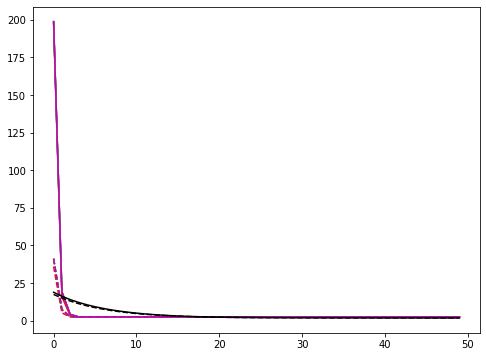

In [9]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()